<a href="https://colab.research.google.com/github/rebmizrahi/pandas-infographics/blob/main/When_is_it_most_common_for_the_metro_to_break_down%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Infographic assignment:** When is it most common for the metro to break down? 
By Rebecca Mizrahi and Emma Amar (1839626, 1835610)




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

##Load Data:##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('Incidents métro.csv',
                 usecols=["Ligne",
                          "Heure de l'incident",
                          "Code de lieu",
                          "Jour de la semaine",
                          "Jour calendaire"])

In [ ]:
# other way to import the data
from google.colab import files
uploaded = files.upload()


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Incidents métro.csv']),
                 usecols=["Ligne",
                          "Heure de l'incident",
                          "Code de lieu",
                          "Jour de la semaine",
                          "Jour calendaire"])

KeyError: ignored

In [ ]:
df["Jour calendaire"] = pd.to_datetime(df["Jour calendaire"], format="%Y/%m/%d")
df.head()

,Ligne,Heure de l'incident,Code de lieu,Jour de la semaine,Jour calendaire
0,Ligne orange,02:56,Snowdon,2,2019-01-01
1,Ligne orange,02:56,Snowdon,2,2019-01-01
2,Ligne verte,03:35,Place-des-Arts,2,2019-01-01
3,Ligne verte,04:56,Lionel-Groulx,2,2019-01-01
4,Ligne verte,05:25,Berri-UQAM,2,2019-01-01


In [ ]:
df['Mois'] = pd.DatetimeIndex(df['Jour calendaire']).month
df1 = df.groupby(['Mois']).size()
print(df1)

Mois
1     692
2     672
3     782
4     635
5     565
6     634
7     651
8     560
9     651
10    626
dtype: int64


**Analysis 1: Is there a specific month that has more incidents?**

Yes, according to the data displayed in the infographic, March has more incidents than the rest of the months. 

```
Please note that at this point we realized that the dataset does not account for November or December, not sure why, sorry!
```



##Visualization:##

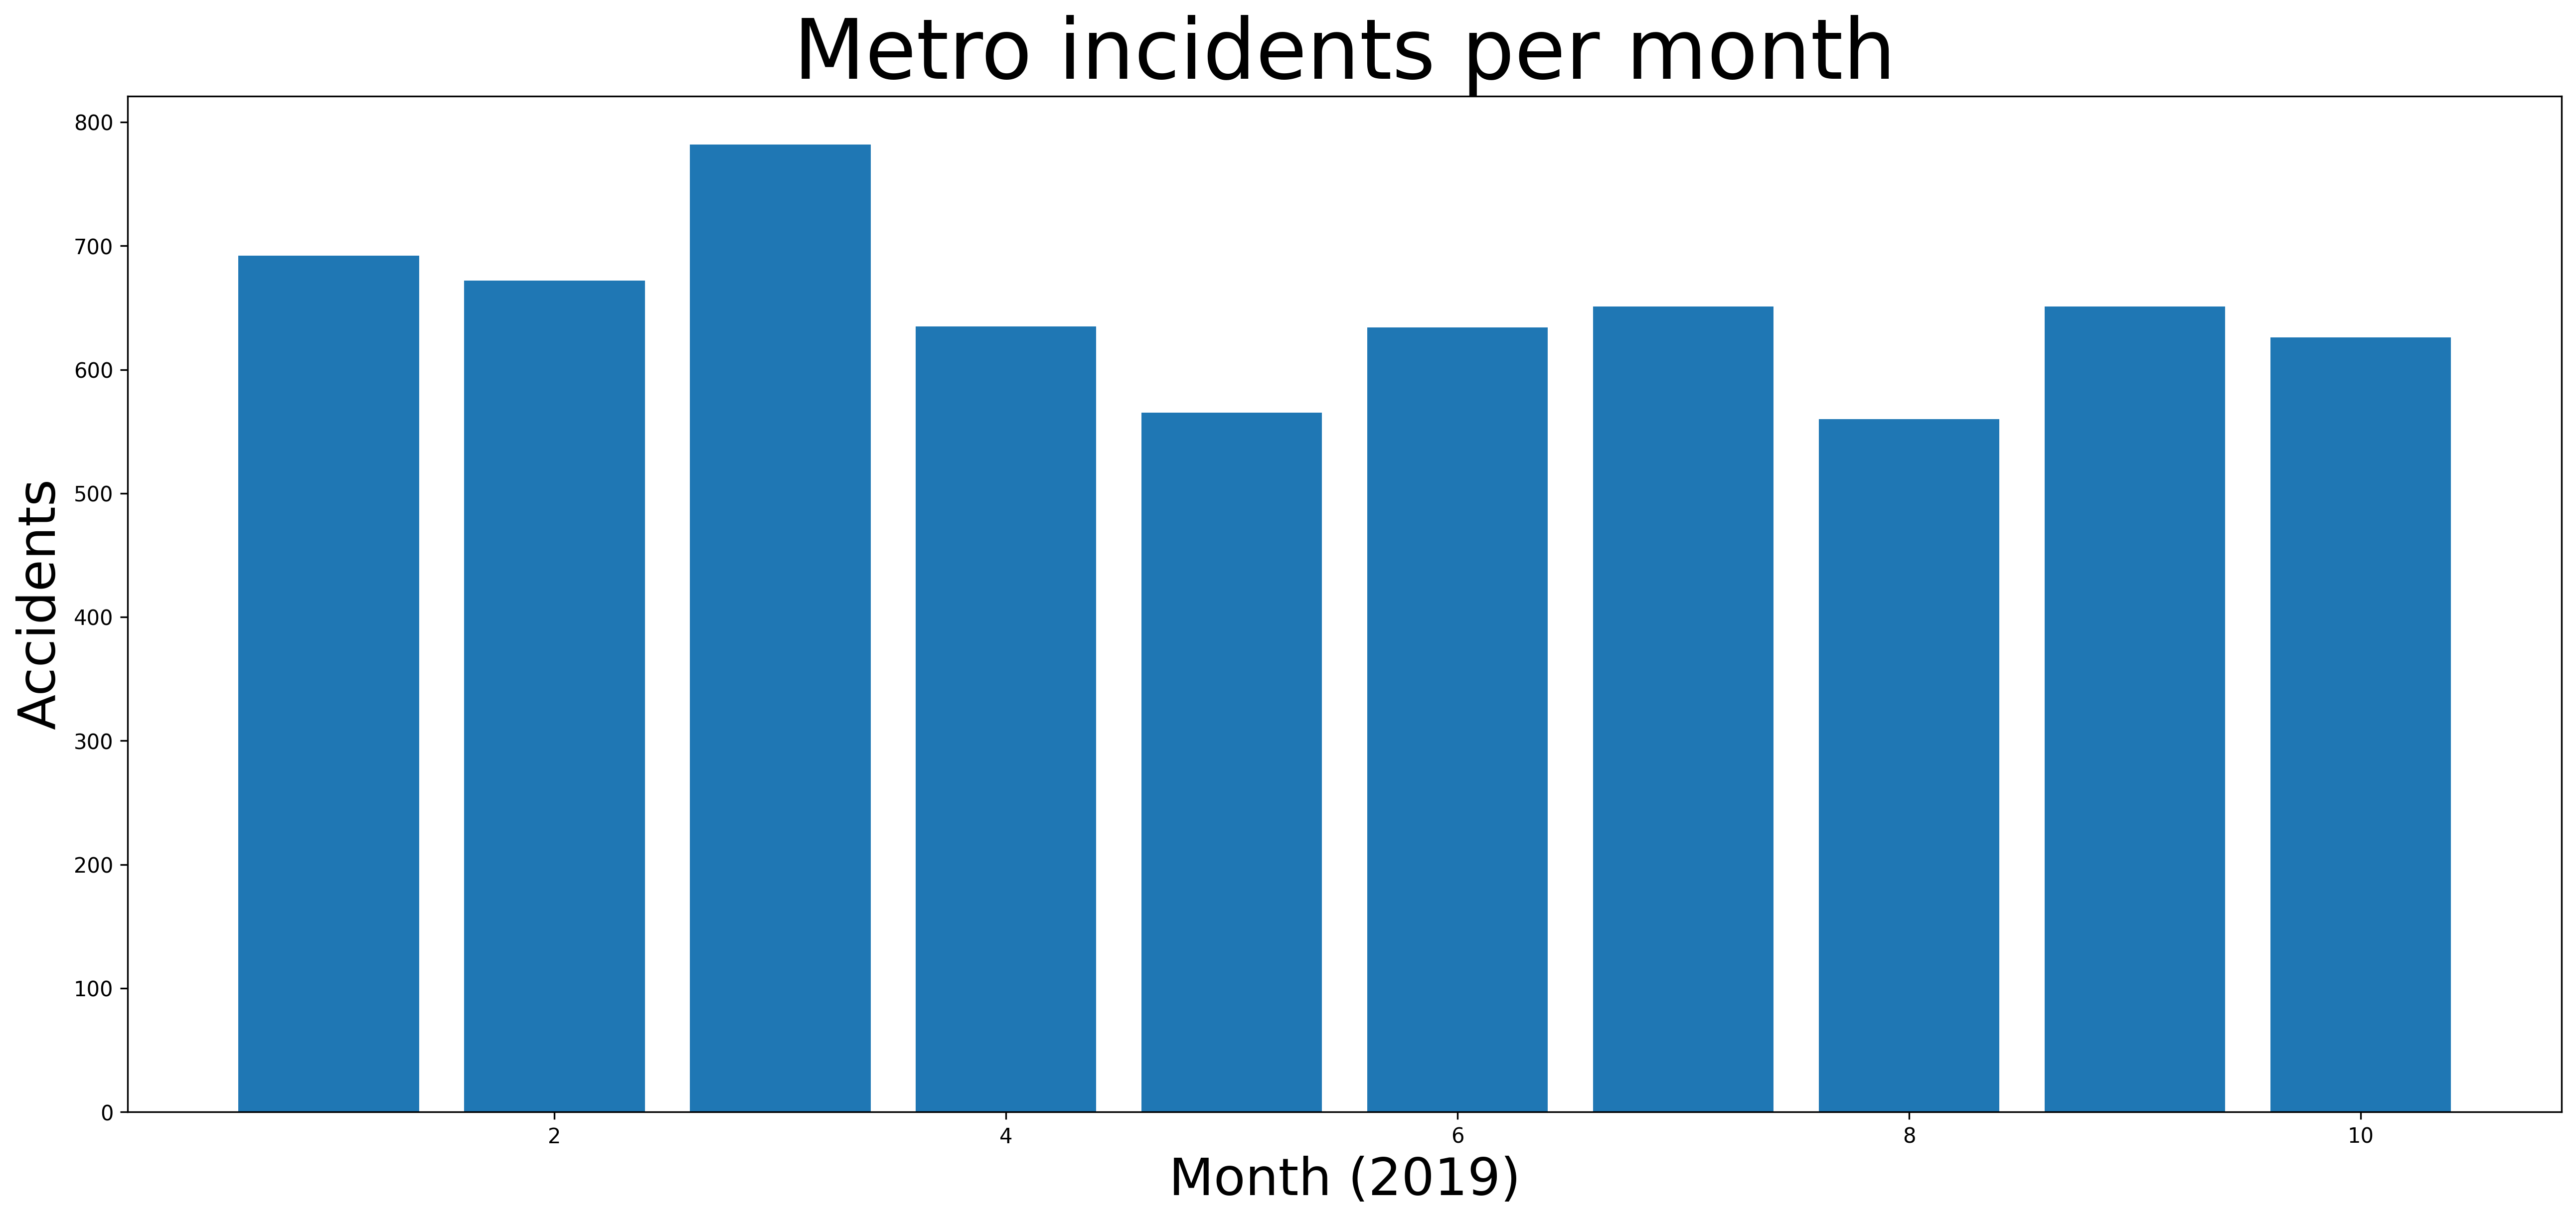

In [ ]:
plt.figure(figsize=[21,9], dpi=300)
plt.bar(df1.index, df1.values)
plt.title("Metro incidents per month", fontsize=40)
plt.xlabel("Month (2019)", fontsize=25)
plt.ylabel("Accidents",fontsize=25)
plt.show()

**Analysis 2: Are there days/groups of days that have very many or very few incidents? i.e. do holidays affect incidents**

Yes, there are days with very many incidents. These are January 24th and September 27th. With this data we can observe that holidays do not affect the amount of incidents.

##Visualization:##

Jour calendaire
2019-01-01    24
2019-01-02    10
2019-01-03    18
2019-01-04    20
2019-01-05    13
dtype: int64


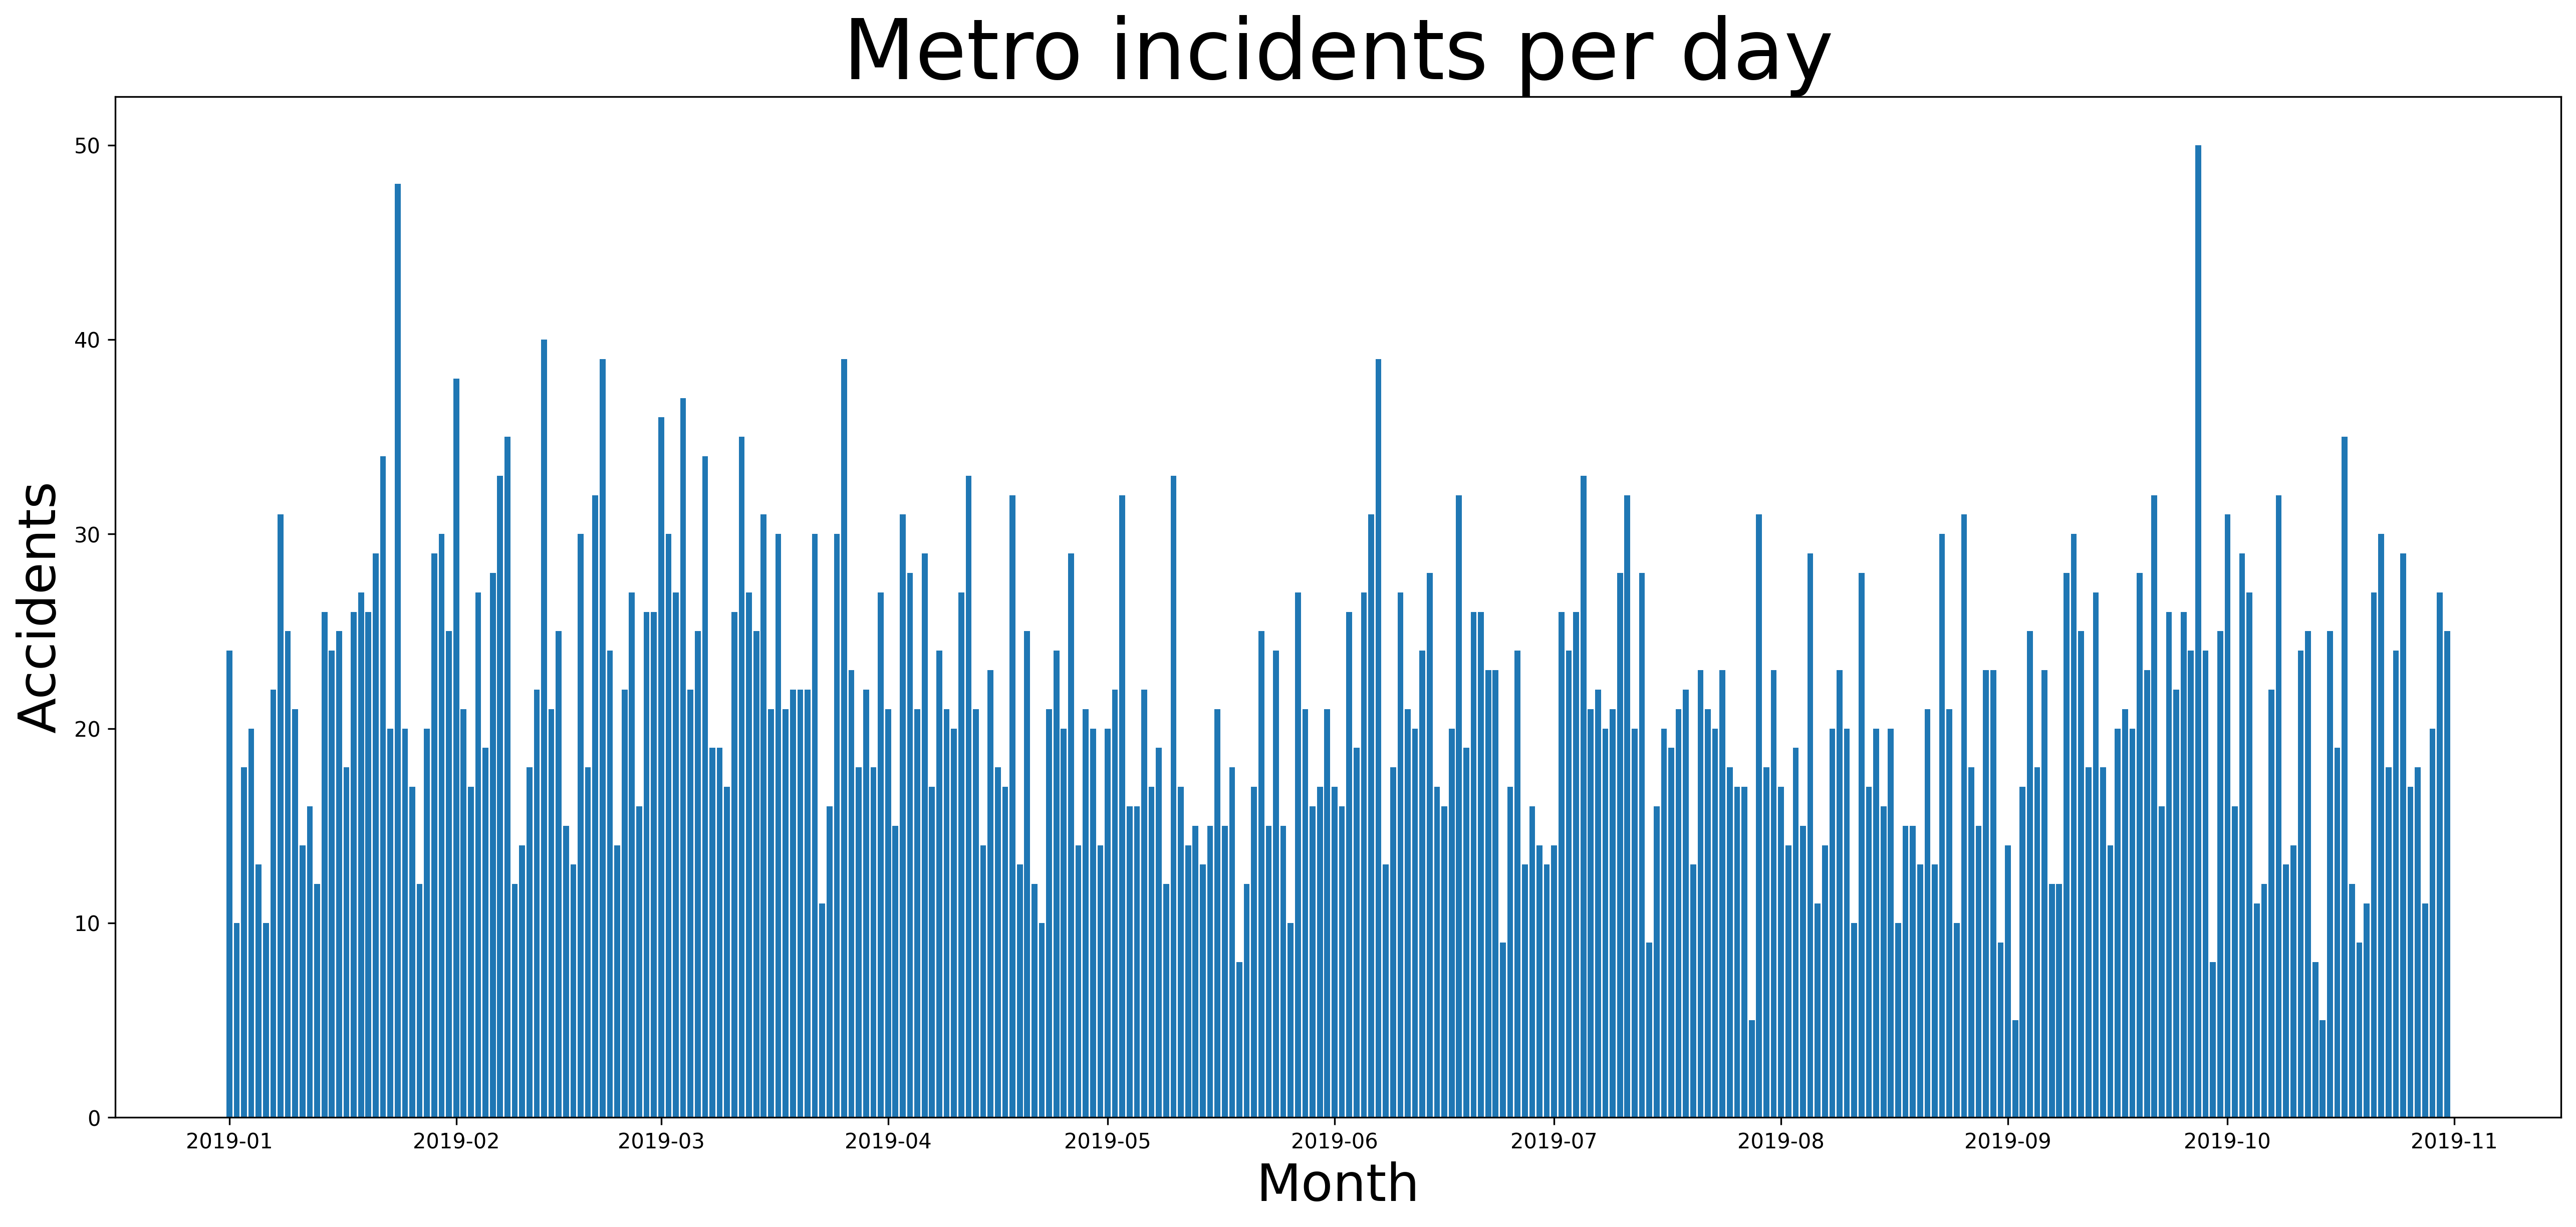

In [ ]:
df3 = df.groupby(['Jour calendaire']).size()
#df3['Jour calendaire'] = df3['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
print(df3.head())
plt.figure(figsize=[21,9], dpi=300)
plt.bar(df3.index, df3.values)
plt.title("Metro incidents per day", fontsize=40)
plt.xlabel("Month", fontsize=25)
plt.ylabel("Accidents", fontsize=25)
plt.show()

In [ ]:
df["Heure de l'incident"] = df["Heure de l'incident"].str[:-3]
df.head()
#do not run more than once!

,Ligne,Heure de l'incident,Code de lieu,Jour de la semaine,Jour calendaire,Mois
0,Ligne orange,02,Snowdon,2,2019-01-01,1
1,Ligne orange,02,Snowdon,2,2019-01-01,1
2,Ligne verte,03,Place-des-Arts,2,2019-01-01,1
3,Ligne verte,04,Lionel-Groulx,2,2019-01-01,1
4,Ligne verte,05,Berri-UQAM,2,2019-01-01,1


In [ ]:
df4 = df.drop(columns=["Ligne", "Code de lieu", "Jour calendaire"])

df4_1 = df4.loc[df4["Jour de la semaine"]==1]
df4_1 = df4_1.drop(columns=["Jour de la semaine"])
df4_1 = df4_1.groupby(["Heure de l'incident"]).size()

df4_2 = df4.loc[df4["Jour de la semaine"]==2]
df4_2 = df4_2.drop(columns=["Jour de la semaine"])
df4_2 = df4_2.groupby(["Heure de l'incident"]).size()

df4_3 = df4.loc[df4["Jour de la semaine"]==3]
df4_3 = df4_3.drop(columns=["Jour de la semaine"])
df4_3 = df4_3.groupby(["Heure de l'incident"]).size()

df4_4 = df4.loc[df4["Jour de la semaine"]==4]
df4_4 = df4_4.drop(columns=["Jour de la semaine"])
df4_4 = df4_4.groupby(["Heure de l'incident"]).size()

df4_5 = df4.loc[df4["Jour de la semaine"]==5]
df4_5 = df4_5.drop(columns=["Jour de la semaine"])
df4_5 = df4_5.groupby(["Heure de l'incident"]).size()

df4_6 = df4.loc[df4["Jour de la semaine"]==6]
df4_6 = df4_6.drop(columns=["Jour de la semaine"])
df4_6 = df4_6.groupby(["Heure de l'incident"]).size()

df4_7 = df4.loc[df4["Jour de la semaine"]==7]
df4_7 = df4_7.drop(columns=["Jour de la semaine"])
df4_7 = df4_7.groupby(["Heure de l'incident"]).size()

**Analysis 3: Are there times during the week that have the most breakdowns? Which day of the week has the most?**

Friday and Saturday are the days where there are the least amount of breakdowns; the other days of the week have similar amounts of breakdowns.

##Visualization:##

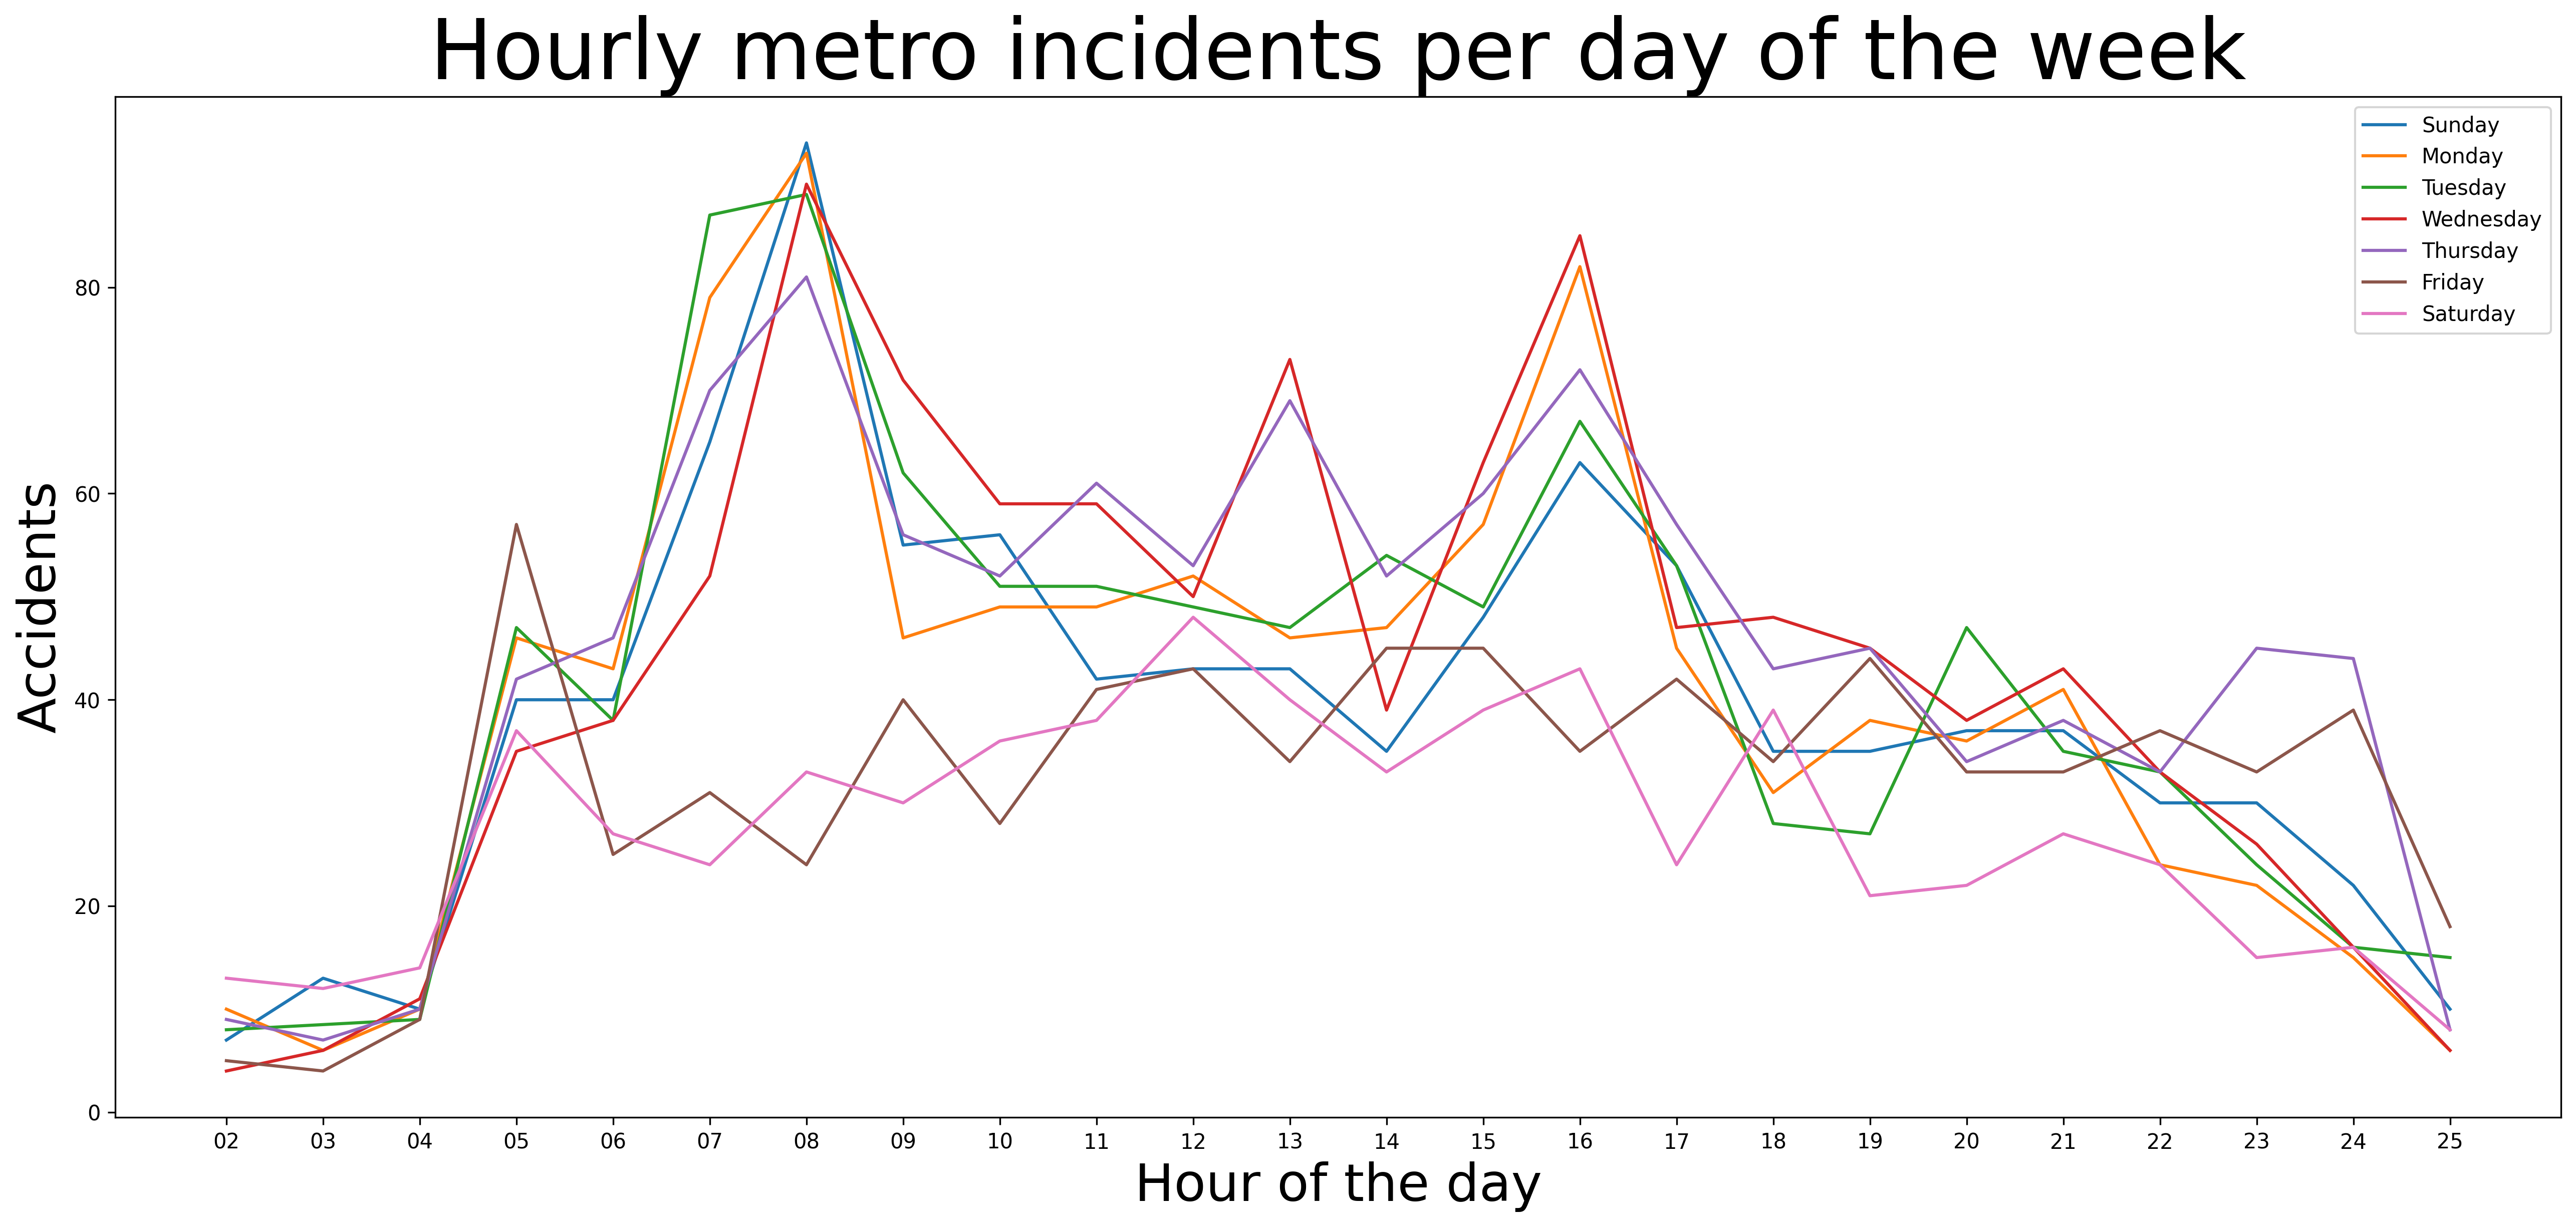

In [ ]:
plt.figure(figsize=[21,9], dpi=300)
plt.plot(df4_1.index, df4_1.values, label="Sunday")
plt.plot(df4_2.index, df4_2.values, label="Monday")
plt.plot(df4_3.index, df4_3.values, label="Tuesday")
plt.plot(df4_4.index, df4_4.values, label="Wednesday")
plt.plot(df4_5.index, df4_5.values, label="Thursday")
plt.plot(df4_6.index, df4_6.values, label="Friday")
plt.plot(df4_7.index, df4_7.values, label="Saturday")
plt.title("Hourly metro incidents per day of the week", fontsize=40)
plt.legend()
plt.xlabel("Hour of the day", fontsize=25)
plt.ylabel("Accidents", fontsize=25)
plt.show()

**Analysis 4: Are there times during the day that have the most breakdowns? Which times have the most breakdowns?**

There are large spikes of incidents between 6-8am and then again from 2-4pm. This could be explained by the morning and afternoon rushes where more people are taking the metro to get to and from work and school.

##Visualization:##

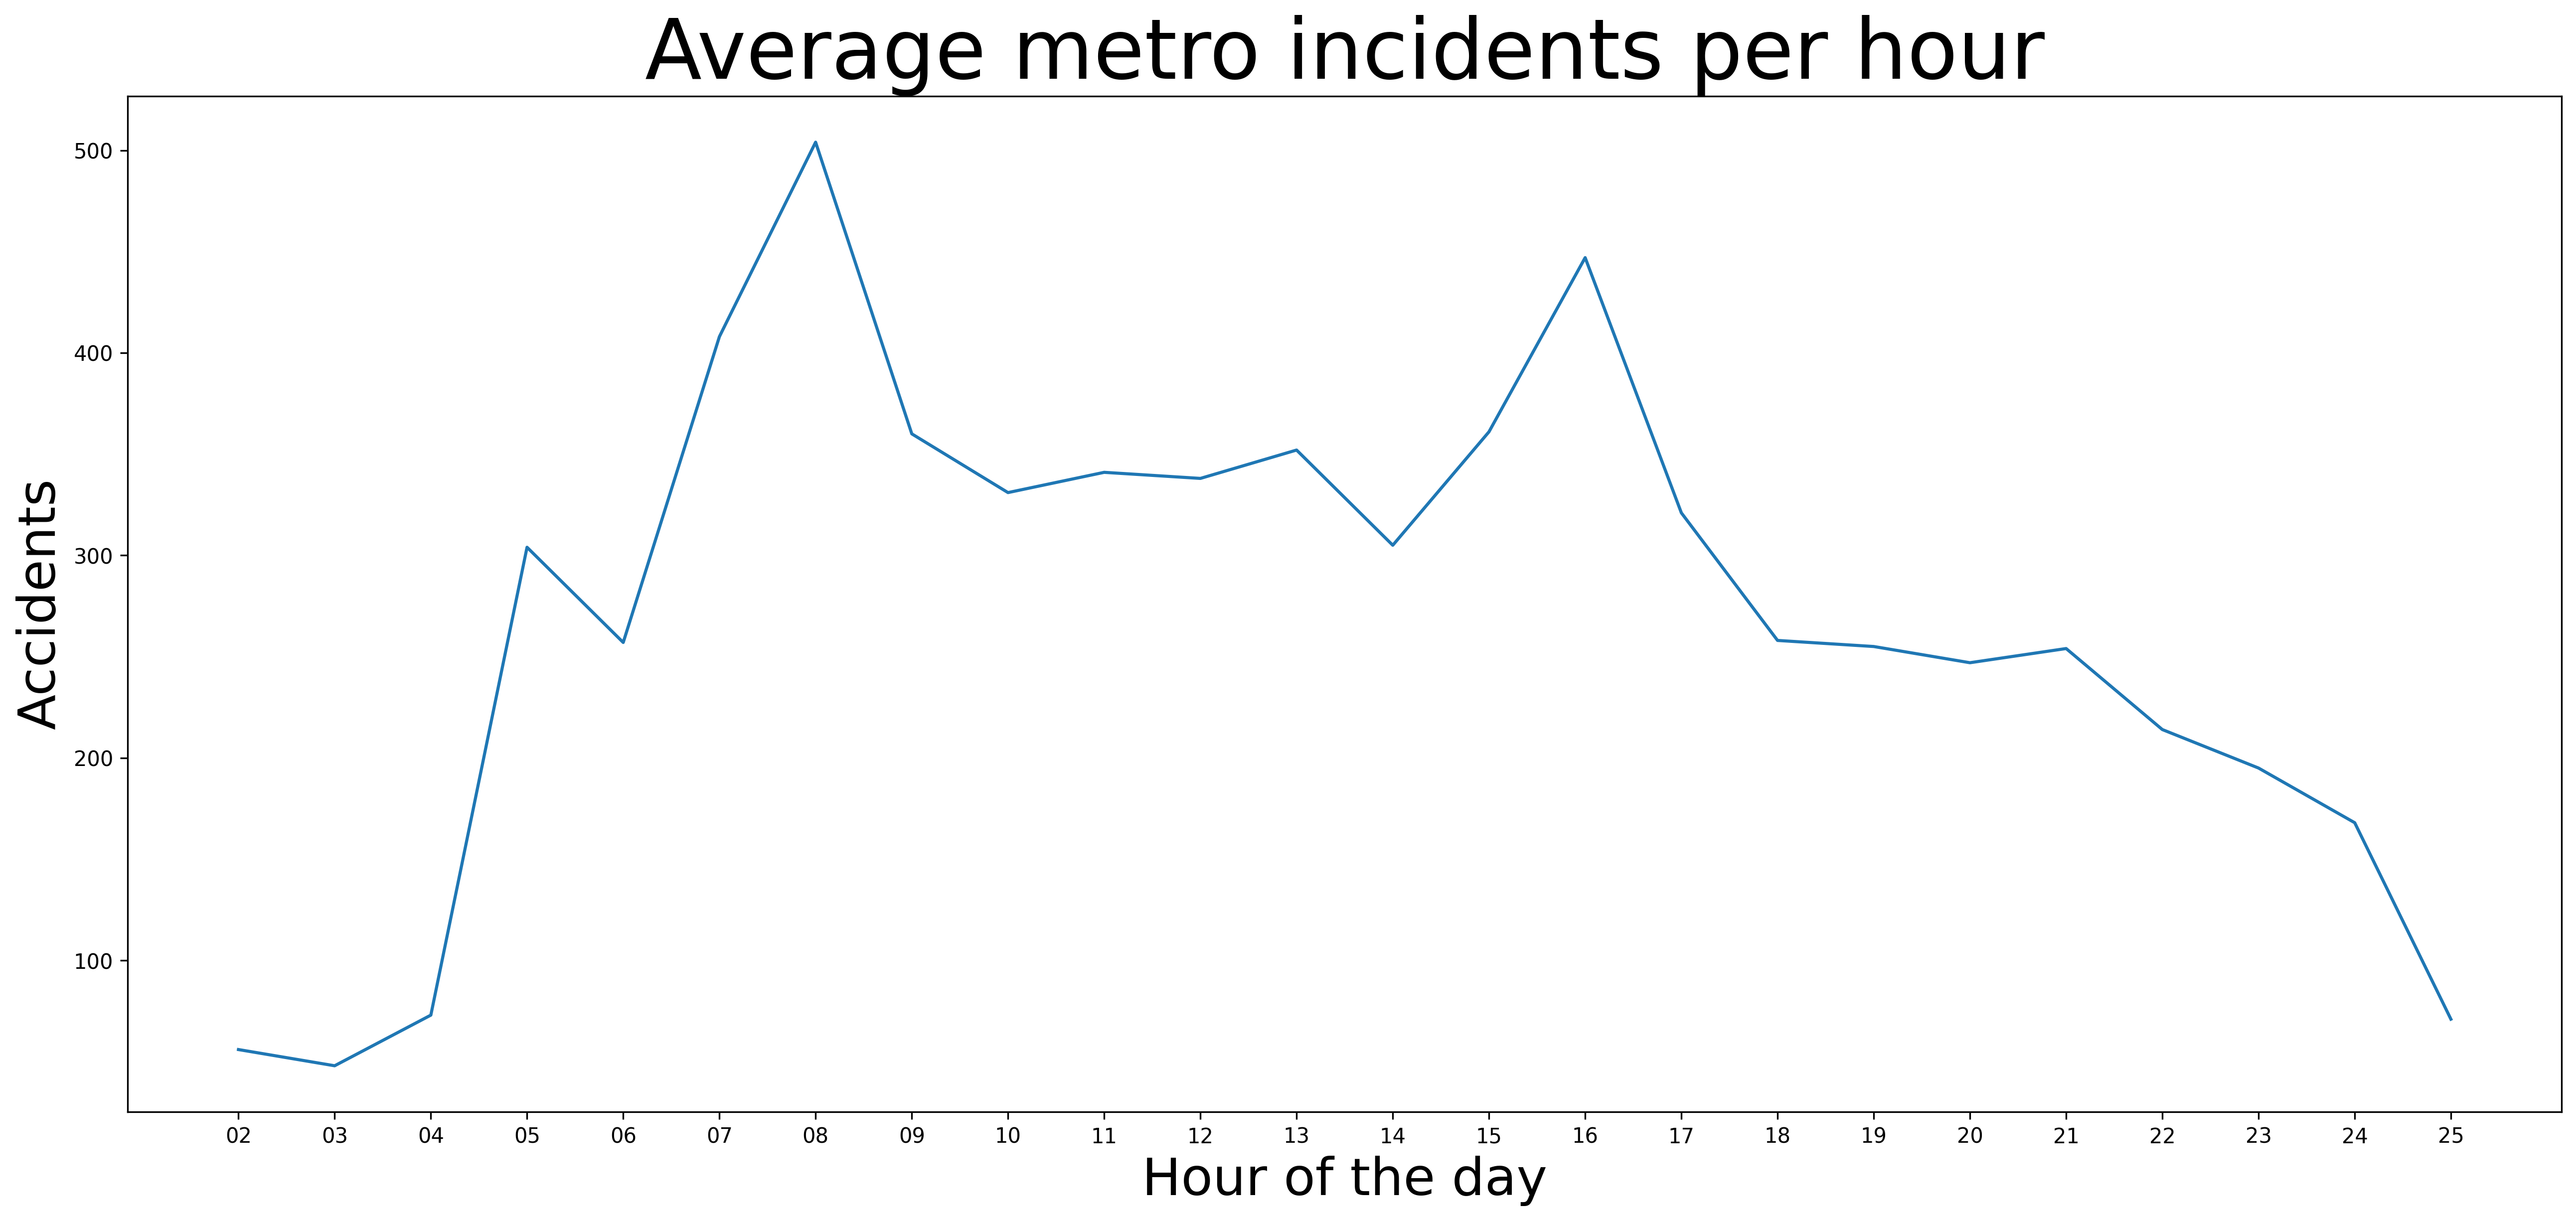

In [ ]:
df2 = df.groupby(["Heure de l'incident"]).size()
df2.head()
plt.figure(figsize=[21,9], dpi=300)
plt.plot(df2.index, df2.values)
plt.title("Average metro incidents per hour", fontsize=40)
plt.xlabel("Hour of the day", fontsize=25)
plt.ylabel("Accidents", fontsize=25)
plt.show()